# Linear Regression Assignment - BoomBikes 

###                                                                                                                          <font color='green'>Sameer Gadicherla</font> 
### Batch: 31st March 2021

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
## import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
## load the dataset
boomData = pd.read_csv("day.csv")
boomData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
## lets check the shape of the dataset
boomData.shape

(730, 16)

In [5]:
##lets check how many missing values are there
boomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
## other way to confirm that there are no missinf data
print(100 * boomData.isnull().sum()/boomData.shape[0])
print("-----------------------------------------------------------------------------------------")

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64
-----------------------------------------------------------------------------------------



### Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [7]:
##lets look at the data again
boomData.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### Let's drop registered and casual , as we are not concerend about type of registration, but only registration on a whole

In [8]:
boomData.drop(columns=['registered','casual'],inplace=True)

If we look at the description of the ```season``` and ```weathersit```, though they are numbers, they are actually categorical in nature. So, lets convert them to strings in order to get more sense to data

In [9]:
## value counts of season
boomData.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

lets write a function to convert these to their respective meanings, based on the data dictionary 
- 1:spring
- 2:summer
- 3:fall
- 4:winter


In [10]:
## lets remap the season values
boomData.season = boomData.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
boomData.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [11]:
## value counts of weathersit
boomData.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

lets write a function to convert these to their respective meanings, based on the data dictionary 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

And in the value counts we can see that there are only three values and not four, lets make them to Clear,Mist,Rainy

In [12]:
## lets remap the weathersit values
boomData.weathersit = boomData.weathersit.map({1:"Clear", 2:"Mist", 3:"Rainy"})
boomData.weathersit.head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [13]:
## printing the dataframe again
boomData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
## Lets look at the value_counts of year
boomData.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

So, we have exactly two years data which are 365 days each. Lets not drop this column as it makes sense to see the trend across two years

In [15]:
## Since the dataset has captured the year, month , weekday and weekend. 'dteday' field is not required, lets drop it
## we can wven drop the 'instant' column as its just an index and doesnt add any insight numerically
boomData.drop(columns = ['dteday','instant'] , inplace=True)
boomData.shape

(730, 12)

In [16]:
## lets look at the weekday values
boomData.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

##### Weekday
- We are not dropping ```weekday``` keeping in mind that monday to sunday has an increasing trend. Its better being numerical!
- We also see that this column can be rearranged to make more sense. 
- 01-01-2018 was a Monday but the weekday is marked as 6 instead of 2 as its the second day of the week.
- Instead we can go srom ```Sunday``` to ```Saturday``` with numbers ranging from ```1``` to ```7```

In [17]:
## lets remap values in this particular column
boomData.weekday = boomData.weekday.map({0:3,1:4,2:5,3:6,4:7,5:1,6:2})
boomData.weekday.head()

0    2
1    3
2    4
3    5
4    6
Name: weekday, dtype: int64

In [18]:
##printing the shape of the df again
boomData.shape

(730, 12)

### After cleaning the data, we are left with 730 rows and 12 columns

# 2) Visualising Data

In [19]:
##lets print the dataframe again
boomData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,2,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,3,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,4,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,5,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,6,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
## lets print the statistics of all the numerical columns now

boomData.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,3.993151,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,1.998959,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,1.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,2.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,4.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,6.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,7.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [21]:
## lets get the list of independent and dependent variables
independent_variables = list(set(list(boomData.columns)) - set(['cnt']))
dependent_variables = ["cnt"]

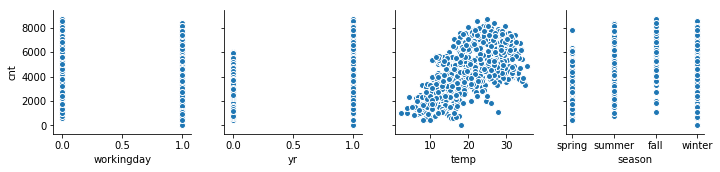

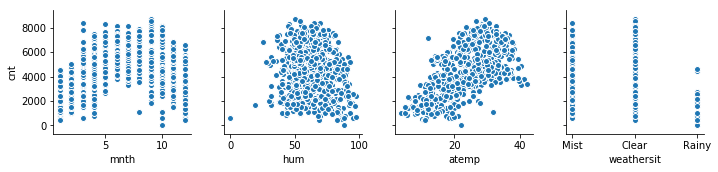

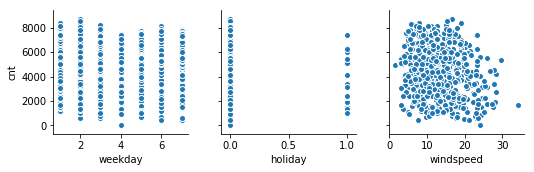

In [22]:
### Lets plot a pair plot of cnt with all the other variables
sns.pairplot(data = boomData,x_vars=independent_variables[0:4],y_vars=dependent_variables)

sns.pairplot(data = boomData,x_vars=independent_variables[4:8],y_vars=dependent_variables)

sns.pairplot(data = boomData,x_vars=independent_variables[8:12],y_vars=dependent_variables)


#### Based on the above pair plots
- we can say that we can expect a linear realtion of ```cnt``` with ```atemp```,  ```temp``` 
- we can see that ```windspeed```,```hum``` have kind of more diversely scattered plot with ```cnt```
- all the other variables are more categorical in nature


#### Visualising Categorical Variables

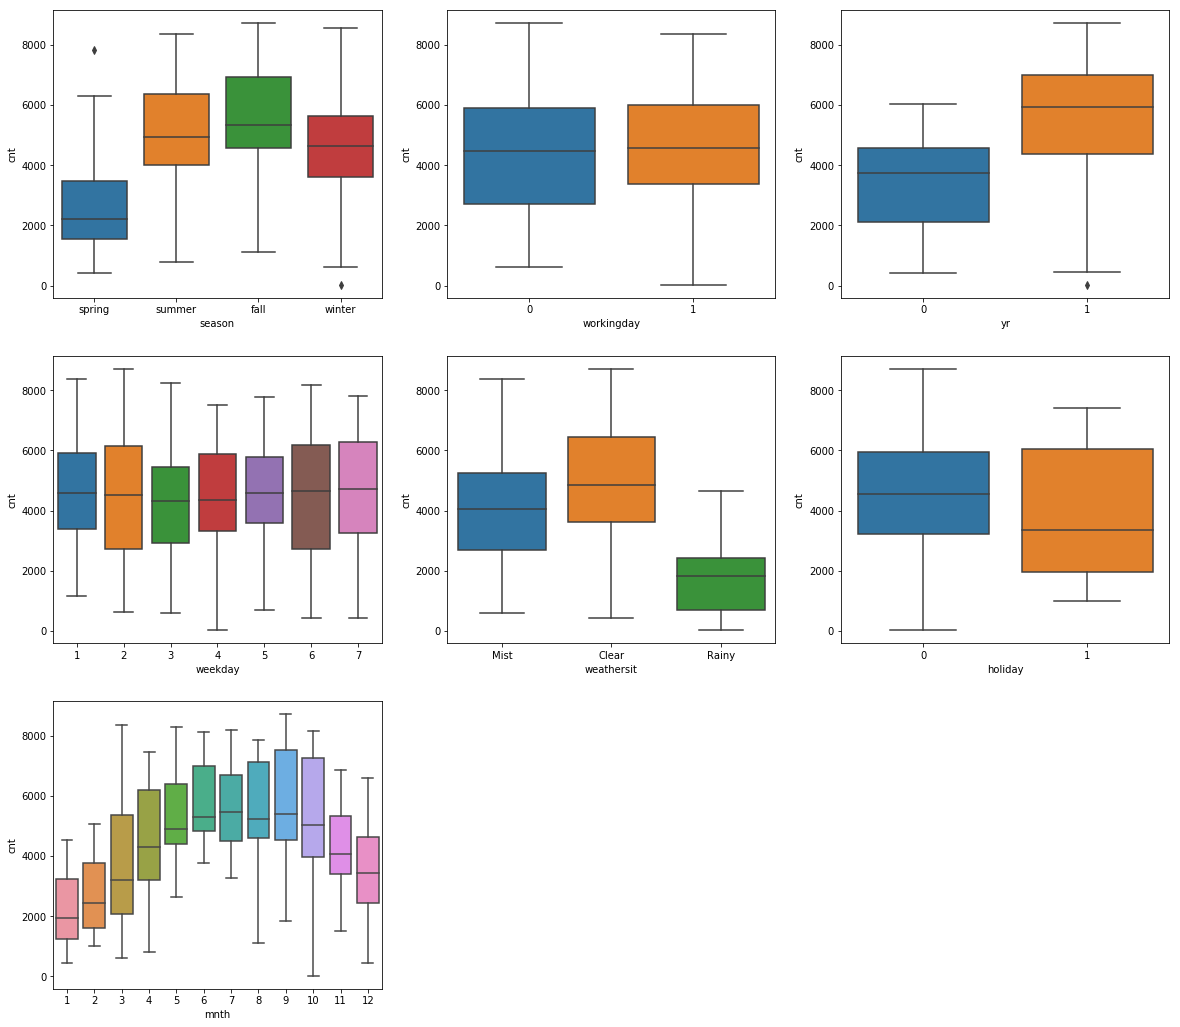

In [23]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomData)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomData)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = boomData)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomData)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomData)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomData)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = boomData)
plt.show()

### High Level relations:
- We can see that during spring there are very less number of riders and more during summer and fall
- We see there are a lot of riders during 2019 compared to 2018
- If the weather situation is rainy we see a lot of less usage of the bikes.
- we see High usage on a non-holiday than a holiday
- When looked month wise we see a kind of increasing trend till July and then decreases towards the year end. this might be due to high work season in the mid of the year.
- All the above interpretations are using median data and we will have a clear picture once we look into the actual model.

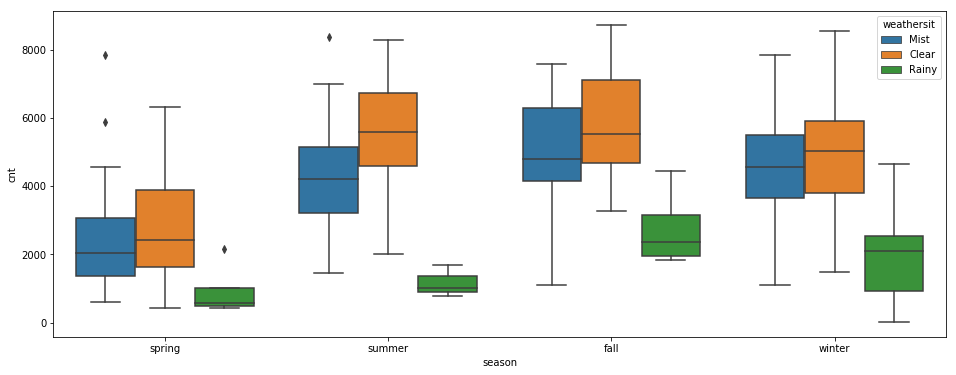

In [24]:
## Lets see cnt in each weather situation in each season
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = boomData)

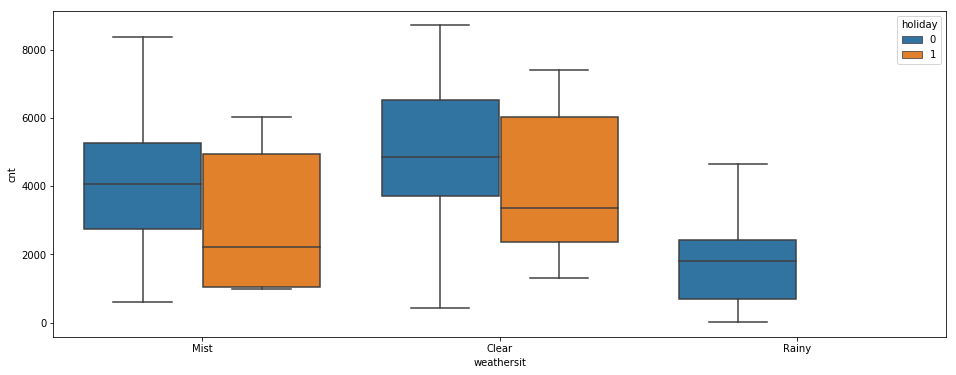

In [25]:
## Lets see affect of holiday in based on weather condition towards rider count
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = boomData)


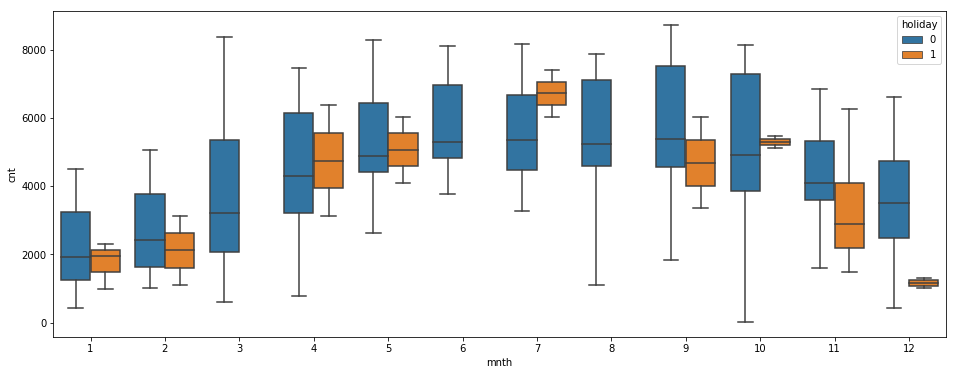

In [26]:
## Lets see affect of holiday in each month towards rider count
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = boomData)

## Bivariate analysis based on above plots:
   - We see that across all the seasons, if we observe a rainy weather situation, then riders are less
   - We donot see any data for people riding on a rainy day being a holiday. Other weather situations they do
   - Usually across most of the moths the median number of riders are around the same irrespective of holiday or not. But in the month of JULY people tend to drive more on holidays.
   - In the month of December we observe very less riders if there are holidays.

# 3) Data Preparation

- We see that most of the dual-cateogry variables are already available in 0's and 1's



### Dummy Varibales

##### Lets start with weathersit

In [27]:
## checking weathersit value_counts
boomData.weathersit.value_counts()

Clear    463
Mist     246
Rainy     21
Name: weathersit, dtype: int64

In [28]:
## lets create dummy variables for weather sit and store it in weather_dummies
weather_dummies = pd.get_dummies(boomData.weathersit)

In [29]:
## lets check what weather_dummies looks like
weather_dummies.head()

,Clear,Mist,Rainy
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


We can drop the first column ```Clear```, as we can interpret using mist and rainy. If both mist and rainy are 0 0 then its ```Clear```

In [30]:
#drop the first column
weather_dummies = pd.get_dummies(boomData.weathersit,drop_first=True)
weather_dummies.head()

,Mist,Rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [31]:
## Lets drop weathersit, as we donot need it 
boomData = boomData.drop(columns=['weathersit'])

##### Lets now look at season

In [32]:
## checking season value_counts
boomData.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [33]:
## lets create dummy variables for season and store it in season_dummies and drop the first column to maintain n-1 dummies
season_dummies = pd.get_dummies(boomData.season,drop_first=True)

In [34]:
##lets see what it looks like
season_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
## Lets drop season, as we donot need it 
boomData = boomData.drop(columns=['season'])

##### Coming to mnth

We need to convert these to dummies as we can get month wise impacts

In [36]:
## checking mnth value_counts
boomData.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [37]:
## lets rename the values to respective month names
boomData.mnth = boomData.mnth.map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [38]:
## lets create dummy variables for mnth and store it in mnth_dummies and drop the first column to maintain n-1 dummies
mnth_dummies = pd.get_dummies(boomData.mnth,drop_first=True)

In [39]:
##lets see what it looks like
mnth_dummies.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [40]:
## Lets drop mnth, as we donot need it 
boomData = boomData.drop(columns=['mnth'])

##### Coming to weekday

We need to convert these to dummies as we can get day wise impacts

In [41]:
## checking weekday value_counts
boomData.weekday.value_counts()

4    105
3    105
2    105
7    104
5    104
1    104
6    103
Name: weekday, dtype: int64

In [42]:
## lets rename the values to respective weekday names
boomData.weekday = boomData.weekday.map({1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"})

In [43]:
## lets create dummy variables for mnth and store it in weekday_dummies and drop the first column to maintain n-1 dummies
weekday_dummies = pd.get_dummies(boomData.weekday,drop_first=True)

In [44]:
##lets see what it looks like
weekday_dummies.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [45]:
## Lets drop weekday, as we donot need it 
boomData = boomData.drop(columns=['weekday'])

### Now lets join these new columns with the main dataframe

In [46]:
boomData = pd.concat([boomData,weather_dummies,season_dummies,mnth_dummies,weekday_dummies],axis=1)
boomData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,Rainy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
##lets relook at the shape
boomData.shape

(730, 30)

- We now increased the numer of columns to 30 from 12

## 4) Train-Test Split

In [48]:
# setting the seed so that train and test data set always have the same rows, respectively
np.random.seed(0)

# lets split train:test as 70% to 30%
boomData_train, boomData_test = train_test_split(boomData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
print("train data shape is: ",boomData_train.shape)
print("test data shape is: ",boomData_test.shape)

train data shape is:  (510, 30)
test data shape is:  (219, 30)


## 5) Rescaling

Lets use the minmaxscaler of sklearn

In [50]:
## initialise the scaler
scaler = MinMaxScaler()

Lets scale all the variables apart from the variables which have only 0's and 1's

In [51]:
## lets look at the dataset again
boomData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,Rainy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
## the below are list of variables which we want to scale
features_to_scale = ["temp","atemp","hum","windspeed","cnt"]

## fit_transform: learn the min max values and apply on these columns
boomData_train[features_to_scale] = scaler.fit_transform(boomData_train[features_to_scale])

In [53]:
## lets print the first few rows of train set again
boomData_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,Rainy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
## lets print the first few rows of train set again
boomData_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,Rainy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that all are rescaled to values between 0 and 1

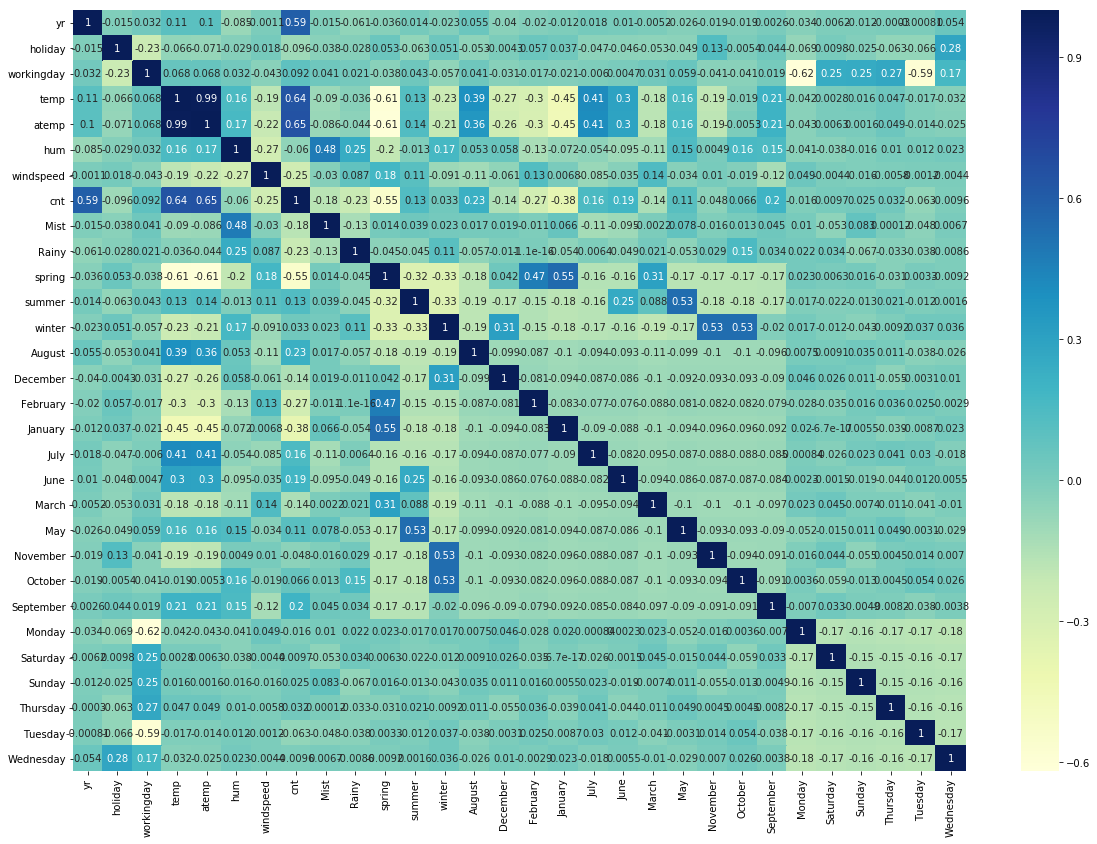

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 14))
sns.heatmap(boomData_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### After rescaling, we observe that:

- ```yr``` ,  ```temp```,  ```atemp``` are having approximately around 0.6
- ```temp```  and  ```atemp``` are 99% correlated with each other, not dropping one of them now, as VIF will eliminate it if necessary.
- ```spring``` and ```January``` are negatively correlated with ```cnt```

## 6) Model Building

As we think ```temp``` and ```atemp``` are highly correlated with ```cnt```, lets build one Simple Linear Regression Model with only ```temp``` and ```cnt```

In [56]:
y_train = boomData_train.pop('cnt')
X_train = boomData_train

In [57]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 29 May 2021   Prob (F-statistic):           5.80e-61
Time:                        13:14:53   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

#### We observe that p-scores are 0 and R2 is explaning 41% of the variance.
We can add more features and check the model performance. Let's use RFE to extract the features and check further from beginning

## RFE

In [60]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE with 20 features selected
rfe = rfe.fit(X_train, y_train)

In [61]:
# Listing the ranks of the the extracted features
ranks = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
ranks_df = pd.DataFrame(ranks, columns =['Variable', 'Support', 'Rank'])
ranks_df.sort_values("Rank")

,Variable,Support,Rank
0,yr,True,1
23,Monday,True,1
22,September,True,1
20,November,True,1
19,May,True,1
16,July,True,1
15,January,True,1
13,December,True,1
11,winter,True,1
10,summer,True,1


In [62]:
### Features selected by the RFE
rfe_selected = X_train.columns[rfe.support_]
list(rfe_selected)

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'Mist',
 'Rainy',
 'spring',
 'summer',
 'winter',
 'December',
 'February',
 'January',
 'July',
 'May',
 'November',
 'September',
 'Monday']

In [63]:
### Features not - selected by the RFE
rfe_notSelected = X_train.columns[~rfe.support_]
list(rfe_notSelected)

['August',
 'June',
 'March',
 'October',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday']

### Building model using statsmodel, for the detailed statistics over selected features

In [64]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_selected]

In [65]:
##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 29 May 2021   Prob (F-statistic):          1.94e-188
Time:                        13:14:54   Log-Likelihood:                 526.26
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -921.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.038      7.768      0.0

### Observations:
- We see a very decent R2 and Adj.R2 value which is explaining around 84.6% variation in the data
- If we look at the p values, we can see ```atemp``` has the highest p-value of around 0.85 which is pretty much high.

Lets look at the VIF scores to decide on that varaible following the below methodology of elimination
- High p-value(less significant) and High VIF (remove it)
- High-low:
    - High P and Low VIF: remove these first and build a new model
    - Low P and High VIF: remove after the ones above
- Low p and Low VIF (significant and not correlated, so keep them)


In [67]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,379.53
4,atemp,368.80
5,hum,31.84
9,spring,5.73
2,workingday,5.39
6,windspeed,5.13
11,winter,4.28
10,summer,3.58
14,January,2.40
7,Mist,2.33


##### Its clear that atemp has high VIF and high P-value, so we can drop that variable

In [68]:
##dropping atemp
X_train_rfe = X_train_rfe.drop(columns=["atemp"])

#### Lets rebuild the model with the remaining features

In [69]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sat, 29 May 2021   Prob (F-statistic):          1.59e-189
Time:                        13:14:54   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.038      7.774      0.0

### Observations:
- We see that p value of ```temp``` went from 0.42 to 0.45 after dropping ```atemp```
- Even this model has good Adj.R2 exaplaining 84.5% of the variance
- Now looking at the next highest p-value, its for ```May``` with 0.148

Lets look at the VIF scores to decide on that varaible

In [70]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.79
3,temp,19.84
8,spring,5.62
2,workingday,5.39
5,windspeed,4.88
10,winter,4.12
9,summer,3.43
13,January,2.40
6,Mist,2.33
0,yr,2.10


- We also can observe that just by eliminating the ```atemp```, the VIF of ```temp``` fell down from 379 to 19.75.
##### As we can see here that May has less VIF and more P value , we can still continue to eliminate it.

In [71]:
## remove May column
X_train_rfe = X_train_rfe.drop(columns=["May"])

#### Lets rebuild the model with the remaining features

In [72]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sat, 29 May 2021   Prob (F-statistic):          3.55e-190
Time:                        13:14:54   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.0

### Observations:
- Even this model has good Adj.R2 exaplaining 84.6% of the variance with no much change
- Now looking at the next highest p-value, its for ```February``` with 0.112

Lets look at the VIF scores to decide on that varaible

In [73]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.76
3,temp,19.75
8,spring,5.61
2,workingday,5.38
5,windspeed,4.79
10,winter,4.12
9,summer,2.88
13,January,2.40
6,Mist,2.33
0,yr,2.10


##### As we can see here that Feb has less VIF and more P value , we can still continue to eliminate it.

In [74]:
## remove February column
X_train_rfe = X_train_rfe.drop(columns=["February"])

#### Lets rebuild the model with the remaining features

In [75]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sat, 29 May 2021   Prob (F-statistic):          9.55e-191
Time:                        13:14:55   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2759      0.037      7.452      0.0

### Observations:
- Even this model has good Adj.R2 exaplaining 84.6% of the variance with no much change
- Now looking at the next highest p-value, its for ```holiday``` with 0.054

Lets look at the VIF scores to decide on that varaible

In [76]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.16
3,temp,19.14
2,workingday,5.37
5,windspeed,4.78
8,spring,4.57
10,winter,4.12
9,summer,2.87
6,Mist,2.32
0,yr,2.09
16,Monday,2.00


#### ```holiday``` has a low VIF of 1.20 and p value above 0.05, so we can eliminate it

In [77]:
## remove holiday column
X_train_rfe = X_train_rfe.drop(columns=["holiday"])

#### Lets rebuild the model with the remaining features

In [78]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 29 May 2021   Prob (F-statistic):          4.53e-191
Time:                        13:14:55   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.037      7.286      0.0

### Observations:
- Even this model has good Adj.R2 exaplaining 84.5% of the variance, with no much change compared to previous.
- Now all the p-values are below 0.05 i.e, they fall into the 95% confidence interval.

Lets now eliminate the varaibles showing high VIF. Lets have a look at these scores

In [79]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
7,spring,4.50
9,winter,4.11
8,summer,2.86
5,Mist,2.32
0,yr,2.09
15,Monday,1.86


#### ```hum``` has the highest VIF, lets eliminate it though its p-value is less below 0.05. 

In [80]:
## dropping hum column
X_train_rfe = X_train_rfe.drop(columns=["hum"])

#### Lets rebuild the model with the remaining features

In [81]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sat, 29 May 2021   Prob (F-statistic):          5.71e-189
Time:                        13:14:55   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.0

### Observations:
- Even this model has good Adj.R2 exaplaining 84% of the variance, with no much change compared to previous.
- All the p-values are below 0.05 i.e, they fall into the 95% confidence interval.

Lets have a look at these VIF scores

In [82]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
6,spring,3.09
8,winter,3.02
7,summer,2.32
0,yr,2.08
14,Monday,1.86
12,November,1.78
10,January,1.67


- just by removing the ```hum``` variable, the VIF of ```temp``` fell down from 18.94 to 6.92 which is better.
- ```temp``` is having VIF greater than 5, but when looked at the p-score its 0 , but its explaining 43.44% of the variation in the ```cnt```.
- So should we drop it? Let's drop and check if any other variables become more informative due to the removal of temp.

In [83]:
## dropping temp column temporarily
X_train_new = X_train_rfe.drop(columns=["temp"])

#### Lets rebuild the model with the remaining features

In [84]:
##dropping previous const column
X_train_new = X_train_new.drop(columns=["const"])

##adding a constant variable
X_train_new = sm.add_constant(X_train_new)

## running the linear model
lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sat, 29 May 2021   Prob (F-statistic):          5.05e-162
Time:                        13:14:55   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5460      0.019     29.005      0.0

### Observations:
- The R2 fell down to 0.793 which is still decent.
- Now because of dropping the ```temp``` column,
    - The p value of July has increased from 0.010 to 0.457 which is huge difference
    - The p value of Winter has increased from 0.00 to 0.325 which is interesting

we can say that its a better chouce to drop temp, and lets look at the ```July``` column

In [85]:
### assigning the dropped changes to the orginal X_train_df
X_train_rfe = X_train_new

In [86]:
## VIF Scores

##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.25
1,workingday,3.55
5,spring,3.03
7,winter,3.00
6,summer,2.25
0,yr,1.91
11,November,1.76
9,January,1.64
13,Monday,1.63
3,Mist,1.56


##### ```July``` has high p value and less VIF, we can still proceed to drop

In [87]:
## dropping July column
X_train_rfe = X_train_rfe.drop(columns=["July"])

#### Lets rebuild the model with the remaining features

In [88]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sat, 29 May 2021   Prob (F-statistic):          5.30e-163
Time:                        13:14:55   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5400      0.017     31.683      0.0

### Observations:
- Even this model has good Adj.R2 exaplaining 79.3% of the variance, with no much change compared to previous.
- ```winter``` has a higher p-value of 0.446

Lets have a look at these VIF scores

In [89]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.08
1,workingday,3.30
7,winter,2.83
5,spring,2.77
6,summer,1.99
0,yr,1.88
10,November,1.76
9,January,1.64
12,Monday,1.57
3,Mist,1.56


##### ```winter``` has relatively higher VIF but below 5 , but a larger P-value . So , lets drop it

In [90]:
## dropping winter column
X_train_rfe = X_train_rfe.drop(columns=["winter"])

#### Lets rebuild the model with the remaining features

In [91]:
##dropping previous const column
X_train_rfe = X_train_rfe.drop(columns=["const"])

##adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sat, 29 May 2021   Prob (F-statistic):          5.41e-164
Time:                        13:14:55   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5360      0.016     33.127      0.0

### Observations:
- Even this model has good Adj.R2 exaplaining 79.3% of the variance, with no change compared to previous.
- All variables have p-values less than 0.05, almost 0 to most of them which is good.
- We see lot of coefficients acting negatively to the ```cnt```

Lets have a look at these VIF scores

In [92]:
##dropping constant as it doesnt make sense to see its VIF
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.92
1,workingday,3.20
5,spring,2.38
0,yr,1.87
6,summer,1.77
8,January,1.63
3,Mist,1.54
11,Monday,1.54
9,November,1.22
10,September,1.20


### All VIF scores are now below 5 and along with p-values as well below 0.05 thereby we can stop our iteration of finetuning here.

In [93]:
print("The selected features are: ", list(vif.Features))

The selected features are:  ['windspeed', 'workingday', 'spring', 'yr', 'summer', 'January', 'Mist', 'Monday', 'November', 'September', 'December', 'Rainy']


## 7) Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [94]:
## lets predict on the train data
y_train_pred = lm.predict(X_train_rfe)

In [95]:
## Create a series of error terms
train_error_series = pd.Series(y_train-y_train_pred)
train_error_series.head()

653    0.083462
576    0.039921
426   -0.005563
728   -0.093121
482   -0.198553
dtype: float64

C:\Users\Sameer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


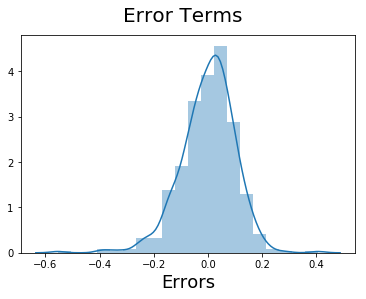

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(train_error_series, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     
plt.show()

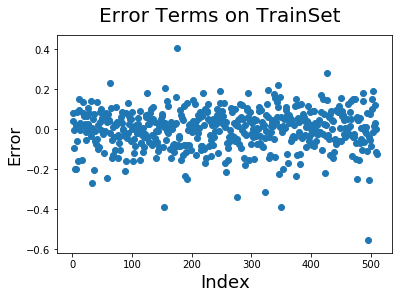

In [97]:
##Scatter plot with index to check the distribution
c = [i for i in range(1,y_train.shape[0]+1,1)]
fig = plt.figure()
plt.scatter(c,train_error_series)
fig.suptitle('Error Terms on TrainSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Error', fontsize=16)                # Y-label
plt.show()

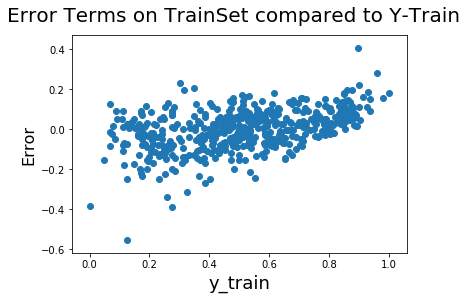

In [98]:
##Scatter plot with y_train to check the distribution
fig = plt.figure()
plt.scatter(y_train,train_error_series)
fig.suptitle('Error Terms on TrainSet compared to Y-Train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                      # X-label
plt.ylabel('Error', fontsize=16)                # Y-label
plt.show()

### Observations:

- We see that errors are normally distributed with mean around 0. 
- Also we donot see any patterns on the scatter plot of only error terms and also not visible patterns with y-train values as well, which means constant variance

so the model is a goodone to proceed with!

## 8) Making Predictions on Test Data

#### Applying rescaling on the test set

In [99]:
## Using the previous scaler on the train data, lets apply the learnt min max values on test set
boomData_test[features_to_scale] = scaler.transform(boomData_test[features_to_scale])
boomData_test[features_to_scale].head()

,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


#### Dividing the test data into X_test and y_yest

In [100]:
## assign the cnt column to y-test
y_test = boomData_test.pop('cnt')
X_test = boomData_test

In [101]:
# Now let's use our model to make predictions.

##dropping constant to get the columns without const
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Creating X_test_rfe dataframe by dropping variables from X_test and using the chosen features
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [102]:
# Making predictions
y_test_pred = lm.predict(X_test_rfe)

In [103]:
## lets look at some values
y_test_pred.head()

184    0.429630
535    0.768817
299    0.438503
221    0.527568
152    0.449168
dtype: float64

## 9) Model Evaluation

In [104]:
#checking the r2 value
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7832504527952755

### Let's plot Actual and Predicted on both train and test sets

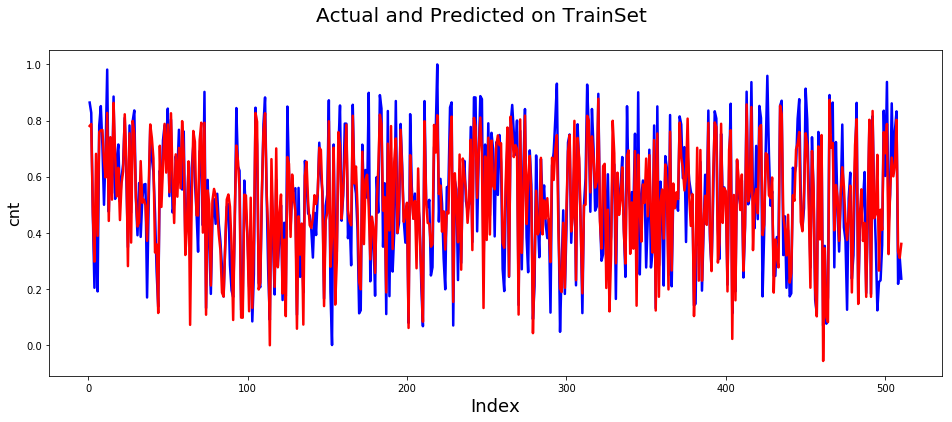

In [105]:
#Actual vs Predicted on train set
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(16,6))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted on TrainSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)  
plt.show()

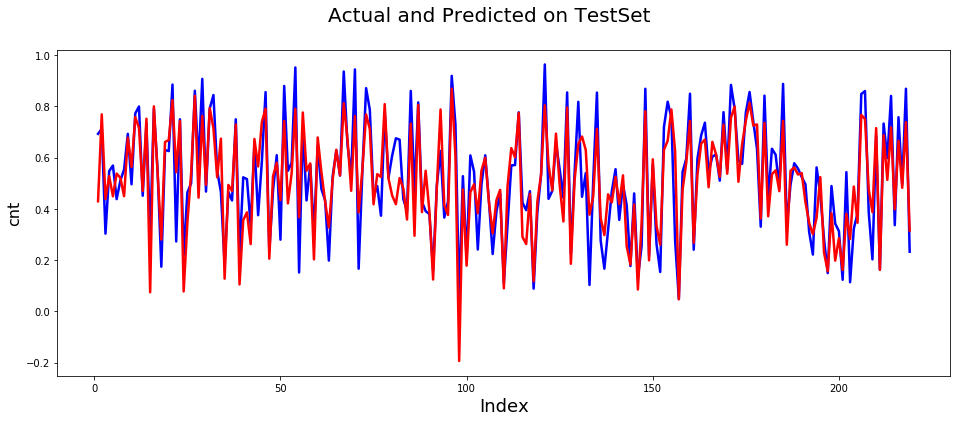

In [106]:
#Actual vs Predicted on test set
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(16,6))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted on TestSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)
plt.show()

Text(0,0.5,'y_test_pred')

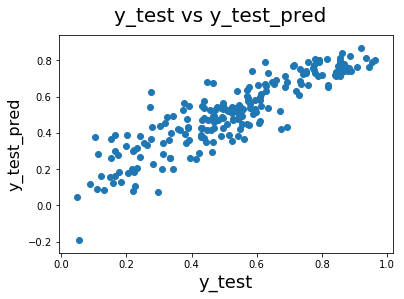

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

### Observations:
- We see that the R2 score on the test set is ```0.783``` which is very close(1.2% away) to the adjusted R2 score which is ```0.793```
- We also see that y_actual v/s y_predicted are closely clustered which is a good sign.
- We can also see on both train and test sets, the predicted values are very close to each other in the line graphs

In [108]:
## lets look at the final coefficients
lm.params.to_frame().sort_values(0)

,0
Rainy,-0.320724
spring,-0.238120
windspeed,-0.192617
January,-0.123145
December,-0.118632
November,-0.112736
Mist,-0.090099
summer,-0.040292
September,0.055846
workingday,0.057024


# Summary

- The eqaution of the best fit line is using the scaled values: 

$ cnt = 0.245744  \times  yr + 0.057024  \times  workingday - 0.192617 \times windspeed - 0.090099 \times Mist - 0.320724 \times Rainy - 0.238120 \times spring - 0.040292 \times summer - 0.118632 \times  December - 0.123145 \times January - 0.112736 \times November + 0.055846 \times September + 0.066525 \times Monday + 0.535951$

- We can clearly see that only 12 features were selected over 30 features after doing some feature engineering.
- A total of 9 models were developed to get the final fine tuned model
- 'windspeed', 'workingday', 'spring', 'yr', 'summer', 'January', 'Mist', 'Monday', 'November', 'September', 'December', 'Rainy' are the final list of selected impacting predictors. 
- We have chosen to drop temperature as an important predictor as it made sense to do so, as few other variables became insignificant. 
- The Final Model has an Adjusted R2 of **```0.793```** which performed on the test set with an R2 score of **```0.783```**

### Feature Wise importance:
- We can clearly see that many predictors have negative impact on the riders count.
- A **Rainy** weather impacts the riders count negatively by **32%**
- A **spring** season impacts the riders count negatively by **23%**
- **20%** negative impact is due to the **windspeed** 
- **November, December and January** are the months which are impacting the rider counts negatively around **10%** each.
- In the year **2019**, we could see around **24% increase** in the count of the riders.

### Based on the above feature behaviours, market strategies could be improved when its:
- A rainy season
- A spring season
- During the months of Nov/Dec/Jan
- On a windy Day!
